Aquest exemple segueix la proposta de **Jordi Torres** al seu llibre **Python Deep Learning**.

# Preparació de les dades

Abans de començar a programar la xarxa neuronal hem d'importar totes les llibreries necessàries i comprovar la versió de TensorFlow del nostre Colab

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.18.0


A continuació, carregam les dades.

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


La càrrega del conjunt de dades retorna quatre matrius NumPy. Les matrius train_images i train_labels són el conjunt d'entrenament. Les matrius test_images i test_labels són el conjunt de prova per avaluar la precisió del model.

L'ús de **dades etiquetades** indica que som en un cas d'**aprenentatge supervisat**.

Les imatges són matrius NumPy quadrades de 28x28 píxels, amb valors entre 0 i 255 (8 bits). Les etiquetes són una matriu d'enters, de 0 a 9. Corresponen al tipus de peça de roba que representa la imatge.

Els noms de classe no són al conjunt de dades, per això ens convé definir-los nosaltres mateixos amb la següent llista.


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Normalitzam els valors d'entrada perquè quedin entre 0 i 1, en lloc d'entre 0 i 255.

In [4]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

Comprovem que les dades tenen la forma que esperam.

In [ ]:
print ("train_images.shape:", train_images.shape)
print("len(train_labels):", len(train_labels))
print ("test_images.shape:", test_images.shape)
print("len(test_labels):", len(test_labels))


train_images.shape: (60000, 28, 28)
len(train_labels): 60000
test_images.shape: (10000, 28, 28)
len(test_labels): 10000


Mirem si les mostres i etiquetes tenen els valors esperats, entre 0 i 9.

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

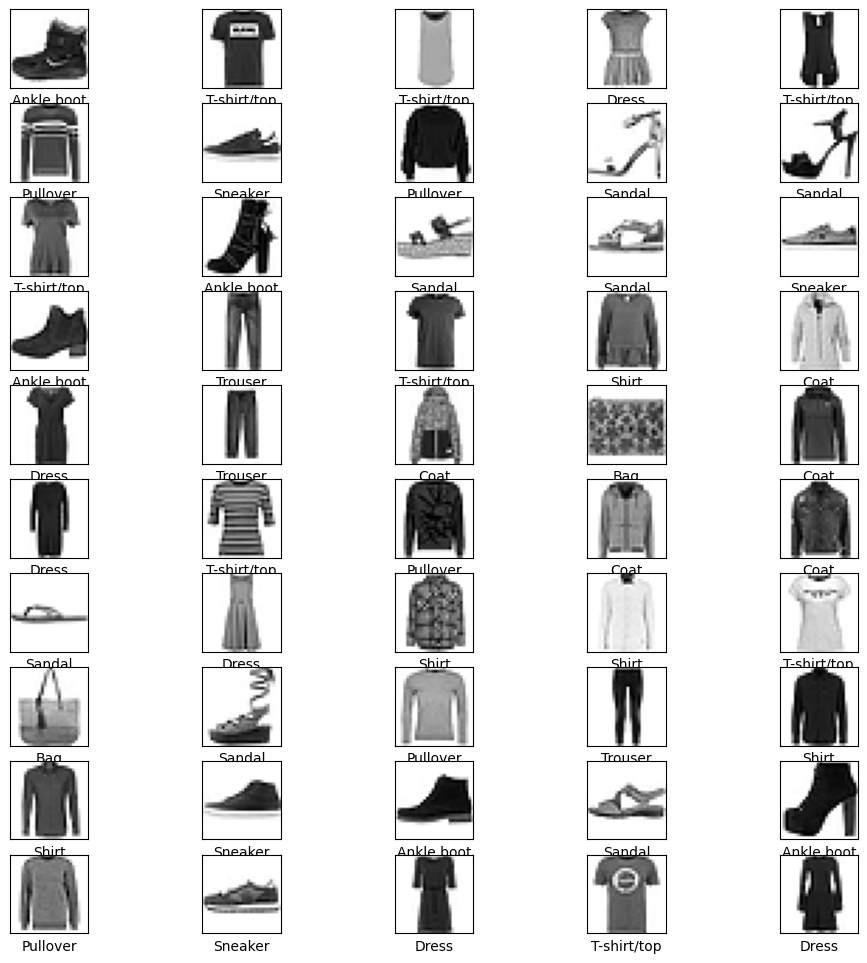

In [7]:
plt.figure(figsize=(12,12))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

# Definició del model

Com que les dades són de la mateixa dimensió i forma, podríem usar el mateix model que en l'exemple anterior de reconeixement de dígits MNIST. Ara bé, hem de preprocessar les dades d'entrada amb la funció `numpy.reshape()`. Això transforma les nostres imatges quadrades en un simple vector. Keras facilita aquesta passa de reconvertir les mostres d'entrada de 28x28 a un vector (array) de 784 nombres, concatenant filera a filera, amb l'ús de la capa `keras.layers.Flatten()`.

In [8]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(10,activation='sigmoid'))
model.add(keras.layers.Dense(10,activation='softmax'))

/Users/carlos/Development/IEDIB_CEIA_2024-25/Sistemas de Aprendizaje automatico/Bloque 5/notes_code/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Comprovarem amb el mètode `summary()` que aquesta capa no necessita paràmetres per aplicar la transformació (columna `Param #`). En general, usarem aquesta capa del model per realitzar aquesta operació en comptes de redimensionar el tensor de dades abans de l'entrada.

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,960 (31.09 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

# Configuració del model

Abans que el model estigui llest per entrenar, s'ha d'especificar el valor d'alguns arguments del mètode de compilació.

In [10]:
model.compile(
    optimizer='sgd',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


Hem especificat com a optimitzador SGD (Stochastic Gradient Descent), com a funció de pèrdues l'entropia creuada categòrica i com a mètrica de rendiment la precisió, és a dir, la fracció d'imatges classificades correctament.

# Entrenament del model

Ja tenim el model definit i configurat per poder entrenar-lo amb el mètode `fit()`, actualitzant els paràmetres perquè aprengui a associar imatges a etiquetes.

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.3120 - loss: 2.0395
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 392us/step - accuracy: 0.6244 - loss: 1.3742
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 338us/step - accuracy: 0.7124 - loss: 1.0911
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.7394 - loss: 0.9279
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 398us/step - accuracy: 0.7513 - loss: 0.8242


A mesura que s'entrena el model, veim que la mètrica de *loss* van disminuïnt i la d'*accuracy* (precisió) va augmentant, fins arribar a gairebé el $74.8$%

# Avaluació i millora del model

La passa següent és comparar el rendiment del model en el conjunt de dades de prova.

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.7495 - loss: 0.7817
Test accuracy: 0.7498999834060669


Observam que aproximadament obtenim la mateixa precisió que en les dades d'entrenament.

# Ús del model per realitzar prediccions

Amb el model ja entrenat, podem començar a usar-lo per realitzar prediccions sobre algunes imatges.

In [13]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step


A la matriu `predictions` hi la **versemblança** de cada etiqueta per a cada imatge del conjunt de prova. Per això, cada component tendrà deu valors, i la posició del màxim indicarà quina és l'etiqueta predita pel model.

In [14]:
predictions[5]

array([9.93448589e-03, 8.21161866e-01, 2.10936554e-03, 1.09921955e-01,
       3.98432650e-02, 1.51311362e-03, 1.13565484e-02, 6.93847833e-04,
       1.76431518e-03, 1.70129782e-03], dtype=float32)

Trobem la posició del màxim (correspon al valor 0.7957 i serà la 1, ja que el vector comença a la posició 0)

In [15]:
np.argmax(predictions[5])

np.int64(1)

Ara traduïm aquest valor numèric al nom d'etiqueta, mitjançant la llista que hem definit a l'inici.

In [16]:
class_names[np.argmax(predictions[5])]

'Trouser'

Presentarem gràficament com de bé o de malament es comporta el model.  

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),predictions_array, color="#008800")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')



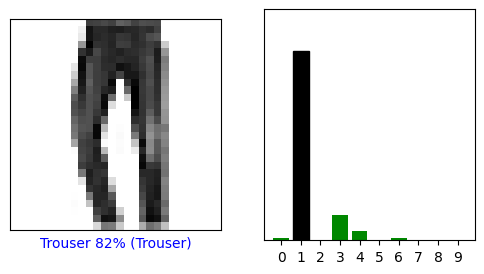

In [18]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

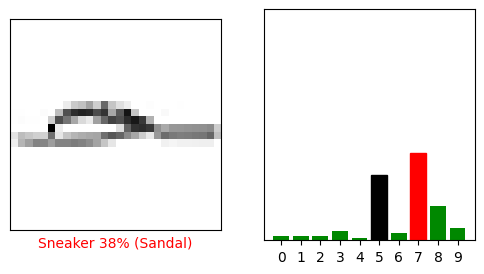

In [19]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

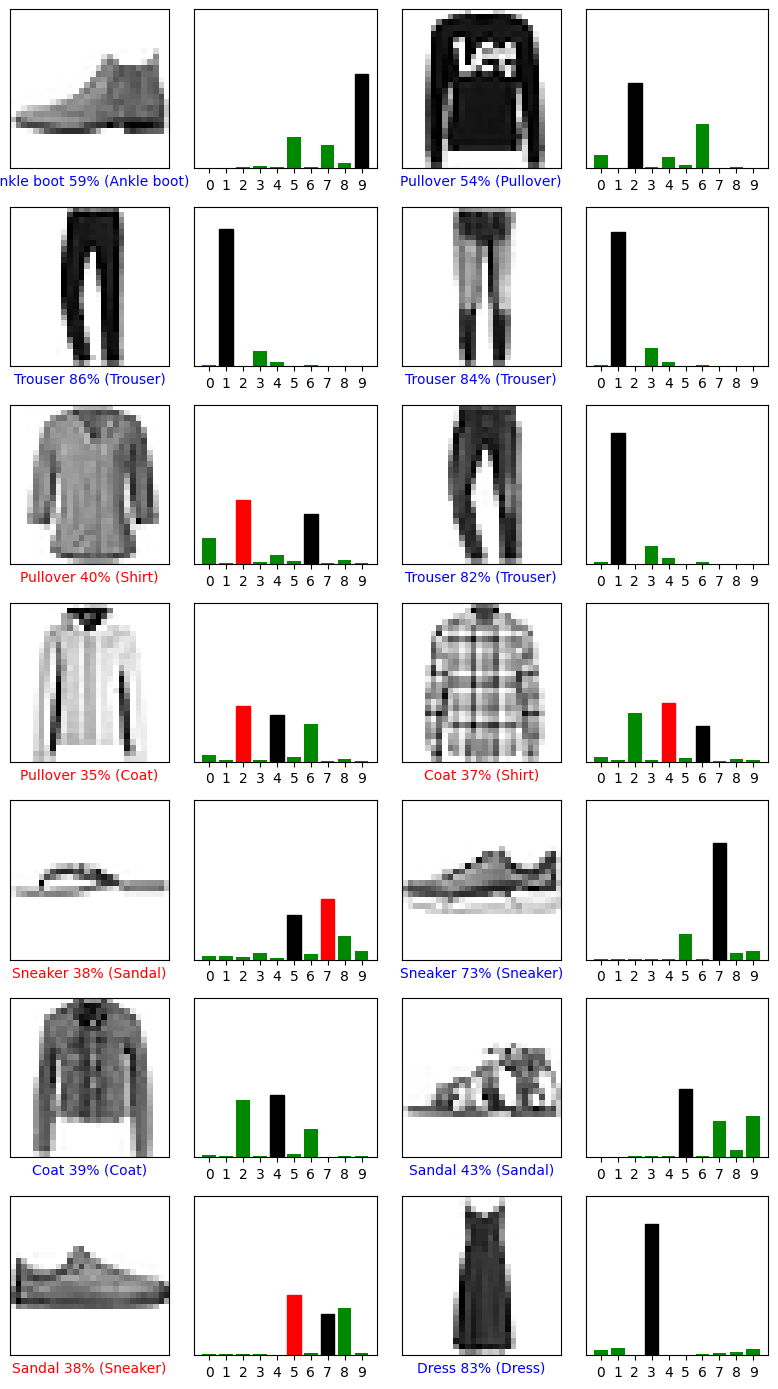

In [20]:
num_rows = 7

num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Millora del model

Observam que la precisió obtinguda d'aquest model per aquestes dades (75%) és molt lluny de la que vàrem obtenir a l'exemple anterior dels dígits (més gran del 85%). És a dir, encara que aquest model era prou bo per a classificar dígits, no ho és tant per a peces de roba.

No és un resultat sorprenent, perquè no hi ha un únic model adequat per a tots els problemes, sinó que cada problema necessita la seva pròpia solució.

Intentem, per exemple, canviar l'optimitzador emprat. L'optimitzador és l'algorisme usat pel model per actualitzar els pesos de cada una de les capes en el procés d'entrenament. Una tria bastant habitual és l'optimitzador `sgd`, però n'hi ha d'altres, com per exemple l'optimitzador `Adam`, que sovint pot fer convergir més bé el procés d'optimització.

In [21]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(10, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.6167 - loss: 1.3835
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.7981 - loss: 0.6204
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.8277 - loss: 0.5198
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 416us/step - accuracy: 0.8427 - loss: 0.4619
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.8504 - loss: 0.4378
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.8348 - loss: 0.4637

Test accuracy: 0.8330000042915344


Veim que només de canviar l'optimitzador s'obté una millora al voltant del $9$%. Encara hi ha moltes més possibles millores, com realitzar més iteracions de l'entrenament, afegir capes internes o bé passar a fer servir xarxes neuronals convolucionals, que veurem al següent lliurament de Programació d'Intel·ligència Artificial.